# URBAN AIR POLLUTION Analysis Using Sensor Data

# Comparing areas are VELACHERY and PERUNGUDI with 5 MAIN POLLUTANTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
data1= pd.read_csv('velachery_ AIQ2.csv', header=None)

In [3]:
#loading dataset
data2= pd.read_csv('perungudi_aiq.csv', header=None)

In [4]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Date,CO,NO,NO2,NOx,SO2,PM2.5,Ozone,WD,SR,T=86.13,R=1.25
1,01-01-2021,0.48,0.39,8.98,9.37,24.87,39.08,28.57,51.76,72.72,85.47,1.36
2,02-01-2021,0.54,0.51,15.15,15.66,24.73,37.73,20.98,87.63,26.32,82.78,1.33
3,03-01-2021,0.52,0.37,9.42,9.79,23.82,32.69,12.67,72.54,43.12,93.15,0.9
4,04-01-2021,0.59,1.09,10.91,12,24.81,42.69,14.29,58.93,68.59,92.27,0.93


In [5]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Date,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,WD,SR,Temp,RH
1,01-01-2021,45.75,0.83,3.44,2.49,4.83,1.43,1.63,163.28,122.99,28.97,NaN
2,02-01-2021,48.51,1,6.35,4.19,4.77,2.96,0.91,231.79,42.2,28.76,NaN
3,03-01-2021,35.51,0.93,4.21,2.99,3.85,NaN,1.33,162.26,59.02,28.68,NaN
4,04-01-2021,20.24,1.07,5.48,3.8,2.46,2.79,1.5,178.46,92.53,28.72,NaN


In [6]:
#defining headers(Capitalized)
col=['DATE','CO','NO','NOx','SO2','PM2.5',
     'Ozone','WD','SR','T=86.13','R=1.25']
col1=['DATE','PM2.5','NO','NO2','NOx','SO2','CO',
     'Ozone','WD','SR','Temp','RH']

In [7]:
#Defining col numbers
r=list(np.arange(len(col)))
r1=list(np.arange(len(col1)))

In [8]:
df1=pd.read_csv('velachery_ AIQ2.csv')
df1.head(3)

,Date,CO,NO,NO2,NOx,SO2,PM2.5,Ozone,WD,SR,T=86.13,R=1.25
0,01-01-2021,0.48,0.39,8.98,9.37,24.87,39.08,28.57,51.76,72.72,85.47,1.36
1,02-01-2021,0.54,0.51,15.15,15.66,24.73,37.73,20.98,87.63,26.32,82.78,1.33
2,03-01-2021,0.52,0.37,9.42,9.79,23.82,32.69,12.67,72.54,43.12,93.15,0.90


In [9]:
df2=pd.read_csv('perungudi_aiq.csv',header=None,skiprows=1,names=col1,usecols=r1)
df2.head(3)

,DATE,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,WD,SR,Temp,RH
0,01-01-2021,45.75,0.83,3.44,2.49,4.83,1.43,1.63,163.28,122.99,28.97,NaN
1,02-01-2021,48.51,1.00,6.35,4.19,4.77,2.96,0.91,231.79,42.20,28.76,NaN
2,03-01-2021,35.51,0.93,4.21,2.99,3.85,NaN,1.33,162.26,59.02,28.68,NaN


In [10]:
df1.dtypes

Date        object
CO         float64
NO         float64
NO2        float64
NOx        float64
SO2        float64
PM2.5      float64
Ozone      float64
WD         float64
SR         float64
T=86.13    float64
R=1.25     float64
dtype: object

In [11]:
df2.dtypes

DATE      object
PM2.5    float64
NO       float64
NO2      float64
NOx      float64
SO2      float64
CO       float64
Ozone    float64
WD       float64
SR       float64
Temp     float64
RH       float64
dtype: object

# Predicting NaN Values using Support Vector Regression

In [12]:
# Check for Missing values

In [13]:
#Counting Missing Values from each Column
print('Missing values:\n\n',df1.shape[0]-df1.count())
clean=(df1.shape[0]-df1.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 Date        0
CO          0
NO          0
NO2         1
NOx         0
SO2        12
PM2.5       0
Ozone       0
WD          0
SR          0
T=86.13     2
R=1.25      2
dtype: int64




In [14]:
#Counting Missing Values from each Column
print('Missing values:\n\n',df2.shape[0]-df2.count())
clean=(df2.shape[0]-df2.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 DATE      0
PM2.5     0
NO        0
NO2       0
NOx       0
SO2       0
CO       53
Ozone     2
WD        4
SR        0
Temp      0
RH       86
dtype: int64




# Predicting SO2 and NO2 values

In [15]:
from sklearn.svm import SVR

In [16]:
#print the correlation matrix
print(df1.corr())

               CO        NO       NO2       NOx       SO2     PM2.5     Ozone  \
CO       1.000000  0.077610 -0.048057  0.012900  0.098866  0.248114 -0.250532   
NO       0.077610  1.000000  0.460756  0.784548 -0.136421 -0.220154 -0.134501   
NO2     -0.048057  0.460756  1.000000  0.907699  0.164358 -0.138311 -0.105579   
NOx      0.012900  0.784548  0.907699  1.000000 -0.030550 -0.195464 -0.144476   
SO2      0.098866 -0.136421  0.164358 -0.030550  1.000000  0.345155 -0.233651   
PM2.5    0.248114 -0.220154 -0.138311 -0.195464  0.345155  1.000000 -0.208644   
Ozone   -0.250532 -0.134501 -0.105579 -0.144476 -0.233651 -0.208644  1.000000   
WD       0.074509  0.252192 -0.244961 -0.006050 -0.391172 -0.209487 -0.098428   
SR      -0.092005 -0.142812 -0.459561 -0.364246 -0.670064 -0.078378  0.306880   
T=86.13  0.230206  0.147337  0.313419  0.324162  0.092768  0.174110 -0.327280   
R=1.25  -0.302415  0.062522 -0.033050  0.023292 -0.262691  0.005355  0.289591   

               WD        SR

In [17]:
#Split training and prediction dataset
cols = ["CO","NO","PM2.5", "Ozone", "NOx", "SO2","WD","SR"]
df = df1[cols]
test_df = df[df["SO2"].isnull()]
df = df.dropna()

In [18]:
y_train = df["SO2"]
X_train = df.drop("SO2", axis=1)
X_test = test_df.drop("SO2", axis=1)

In [19]:
sv = SVR()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

In [20]:
#replace the missing values with predicted values
df1.loc[df1.SO2.isnull(), 'SO2'] = y_pred

In [21]:
y_pred

array([10.91457285, 10.12149283, 10.60293591, 13.69322025,  9.91564573,
        8.77835734, 11.67318946, 10.54056923, 11.84718704, 14.07953866,
       11.78680691, 10.79436384])

# Predicting NO2 values

In [22]:
#Split training and prediction dataset
cols = ["CO","NO","NO2","PM2.5", "Ozone", "NOx", "SO2","WD","SR"]
df = df1[cols]
test_df = df[df["NO2"].isnull()]
df = df.dropna()

In [23]:
y_train = df["NO2"]
X_train = df.drop("NO2", axis=1)
X_test = test_df.drop("NO2", axis=1)

In [24]:
sv = SVR()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

In [25]:
#replace the missing values with predicted values
df1.loc[df1.NO2.isnull(), 'NO2'] = y_pred

In [26]:
y_pred

array([10.18134897])

In [27]:
#Replacing NaN values with 0

In [28]:
df1['T=86.13']=df1['T=86.13'].replace(np.nan,0)

In [29]:
df1['R=1.25']=df1['R=1.25'].replace(np.nan,0)

In [30]:
df1.tail(3)

,Date,CO,NO,NO2,NOx,SO2,PM2.5,Ozone,WD,SR,T=86.13,R=1.25
83,25-03-2021,0.59,1.69,3.73,5.43,11.786807,105.51,11.68,141.85,211.67,71.73,1.31
84,26-03-2021,0.59,1.71,3.74,5.45,10.794364,33.05,16.14,136.94,183.79,0.00,0.00
85,27-03-2021,0.54,1.73,3.74,5.48,2.490000,23.73,18.51,161.49,175.40,0.00,0.00


# Dataset 2 - Perungudi
Predicting CO values

In [31]:
#print the correlation matrix
print(df2.corr())

          PM2.5        NO       NO2       NOx       SO2        CO     Ozone  \
PM2.5  1.000000 -0.198540  0.322918  0.130609  0.378013  0.136404 -0.211814   
NO    -0.198540  1.000000  0.486238  0.795822  0.036766 -0.357813  0.275659   
NO2    0.322918  0.486238  1.000000  0.900436  0.520220 -0.105271 -0.053358   
NOx    0.130609  0.795822  0.900436  1.000000  0.376130 -0.247675  0.089483   
SO2    0.378013  0.036766  0.520220  0.376130  1.000000 -0.061024 -0.284104   
CO     0.136404 -0.357813 -0.105271 -0.247675 -0.061024  1.000000 -0.334130   
Ozone -0.211814  0.275659 -0.053358  0.089483 -0.284104 -0.334130  1.000000   
WD     0.004085 -0.131574  0.010718 -0.057302  0.016901  0.165610  0.055821   
SR    -0.064141  0.229757 -0.093612  0.040361 -0.168697  0.018745  0.400488   
Temp   0.377425 -0.232591  0.261515  0.081247  0.404177  0.323087 -0.625343   
RH          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             WD        SR      Temp  RH  
PM2.5  0.

In [32]:
df2['Ozone']=df2['Ozone'].replace(np.nan,0)

In [33]:
df2['WD']=df2['WD'].replace(np.nan,0)

In [34]:
df2['RH']=df2['RH'].replace(np.nan,-200)

In [35]:
#Split training and prediction dataset
cols1 = ["CO","NO2","PM2.5", "NOx", "SO2","SR","Temp","NO","Ozone"]
dfs = df2[cols1]
test_df = dfs[dfs["CO"].isnull()]
dfs = dfs.dropna()

In [36]:
y_train = df["CO"]
X_train = df.drop("CO", axis=1)
X_test = test_df.drop("CO", axis=1)

In [37]:
sv = SVR()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

In [38]:
#replace the missing values with predicted values
df2.loc[df2.CO.isnull(), 'CO'] = y_pred

In [39]:
y_pred

array([0.50271543, 0.50138531, 0.50154154, 0.50150771, 0.50120522,
       0.5011329 , 0.5012785 , 0.50145172, 0.50155356, 0.50116998,
       0.5011351 , 0.50101175, 0.50123278, 0.50111197, 0.50112024,
       0.50106061, 0.50113271, 0.50111216, 0.50116453, 0.50125617,
       0.50105384, 0.50102147, 0.50097333, 0.50108201, 0.50109729,
       0.50251562, 0.50105449, 0.50116546, 0.50116666, 0.50097199,
       0.50146251, 0.50110471, 0.50136439, 0.50110157, 0.50117861,
       0.50126791, 0.50144808, 0.50115299, 0.50089044, 0.50087288,
       0.50108212, 0.50139063, 0.50091415, 0.50080368, 0.5007264 ,
       0.5010471 , 0.50085285, 0.5011766 , 0.50173063, 0.50189898,
       0.50109092, 0.50091993, 0.5002987 ])

In [40]:
df1.describe()

,CO,NO,NO2,NOx,SO2,PM2.5,Ozone,WD,SR,T=86.13,R=1.25
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.521977,3.625233,9.631295,13.057209,17.181022,33.761047,19.852442,114.352558,132.658605,72.526512,1.354302
std,0.048211,2.411690,3.792095,5.487372,9.231304,20.773733,15.287962,43.458783,49.798189,13.316374,0.315373
min,0.390000,0.010000,0.020000,0.000000,2.490000,5.400000,3.490000,23.850000,6.860000,0.000000,0.000000
25%,0.490000,1.730000,8.615000,9.942500,8.702500,20.245000,10.822500,80.615000,91.292500,69.285000,1.220000
50%,0.520000,4.425000,10.220000,14.670000,13.886379,31.080000,16.600000,118.355000,128.380000,72.790000,1.360000
75%,0.560000,4.460000,10.885000,14.937500,25.305000,41.485000,23.637500,150.045000,175.255000,76.602500,1.525000
max,0.600000,11.550000,20.610000,32.160000,37.180000,124.130000,100.510000,193.940000,220.610000,93.150000,2.040000


In [41]:
df2.describe()

,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,WD,SR,Temp,RH
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,33.969302,1.793256,5.661744,4.486163,4.330349,0.830862,12.425465,195.862558,145.275581,28.292326,-200.0
std,16.179516,0.800396,1.841494,1.391461,1.967882,0.780922,13.193634,66.528661,35.346834,0.545162,0.0
min,4.030000,0.720000,1.850000,1.700000,1.180000,0.090000,0.000000,0.000000,17.700000,27.200000,-200.0
25%,21.660000,1.155000,4.425000,3.387500,3.230000,0.501014,2.717500,180.867500,136.110000,27.865000,-200.0
50%,34.725000,1.620000,5.635000,4.630000,3.895000,0.501168,7.620000,211.170000,154.605000,28.410000,-200.0
75%,43.600000,2.375000,6.927500,5.427500,4.937500,0.523179,16.477500,231.827500,166.622500,28.687500,-200.0
max,82.320000,4.090000,9.910000,7.760000,14.410000,3.530000,58.810000,304.000000,211.700000,29.860000,-200.0


In [42]:
df1.shape
#Equal Dimensions

(86, 12)

In [43]:
df2.shape
#Equal Dimensions

(86, 12)

# Check for Missing values

In [44]:
#Counting Missing Values from each Column
print('Missing values:\n\n',df1.shape[0]-df1.count())
clean=(df1.shape[0]-df1.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 Date       0
CO         0
NO         0
NO2        0
NOx        0
SO2        0
PM2.5      0
Ozone      0
WD         0
SR         0
T=86.13    0
R=1.25     0
dtype: int64


No Missing Values


In [45]:
#Counting Missing Values from each Column
print('Missing values:\n\n',df2.shape[0]-df2.count())
clean=(df2.shape[0]-df2.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 DATE     0
PM2.5    0
NO       0
NO2      0
NOx      0
SO2      0
CO       0
Ozone    0
WD       0
SR       0
Temp     0
RH       0
dtype: int64


No Missing Values


# Compare Datasets 

<Figure size 432x288 with 0 Axes>

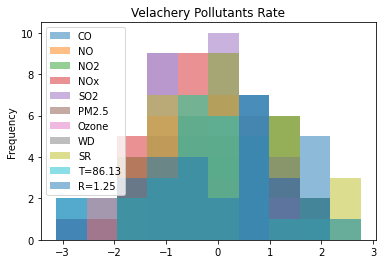

<Figure size 432x288 with 0 Axes>

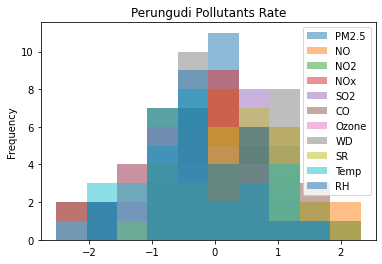

In [46]:
# VELACHERY DATASET REPRESENTATION
df3 = pd.DataFrame({'CO':np.random.randn(30),'NO':np.random.randn(30),'NO2':np.random.randn(30),
                   'NOx':np.random.randn(30),'SO2':np.random.randn(30),'PM2.5':np.random.randn(30)
                   ,'Ozone':np.random.randn(30),'WD':np.random.randn(30),'SR':np.random.randn(30),
                   'T=86.13':np.random.randn(30),'R=1.25':np.random.randn(30)},
    columns =['CO','NO','NO2','NOx','SO2','PM2.5', 'Ozone', 'WD','SR','T=86.13','R=1.25'])
plt.figure()
df3.plot.hist(alpha = 0.5)
plt.title("Velachery Pollutants Rate")
plt.show()

# PERUNGUDI DATASET REPRESENTATION

df4 = pd.DataFrame({'PM2.5':np.random.randn(30),'NO':np.random.randn(30),'NO2':np.random.randn(30),
                   'NOx':np.random.randn(30),'SO2':np.random.randn(30),'CO':np.random.randn(30)
                   ,'Ozone':np.random.randn(30),'WD':np.random.randn(30),'SR':np.random.randn(30),
                   'Temp':np.random.randn(30),'RH':np.random.randn(30)},
    columns =['PM2.5','NO','NO2','NOx','SO2','CO', 'Ozone', 'WD','SR','Temp','RH'])
plt.figure()
df4.plot.hist(alpha = 0.5)
plt.title("Perungudi Pollutants Rate")
plt.show()

# CORRELATION AMONG VARIABLES

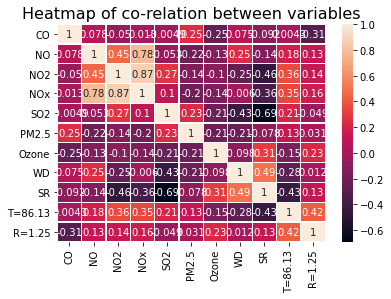

In [47]:
sns.heatmap(df1.corr(),annot=True, linewidths=.2)
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

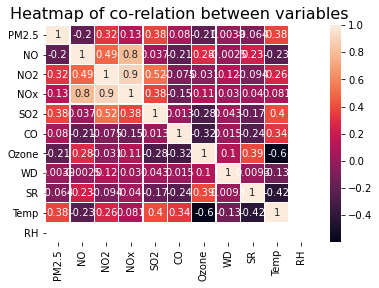

In [48]:
sns.heatmap(df2.corr(),annot=True, linewidths=.2)
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

# Understanding Linearity between Relative Humidity(RH) & other variables

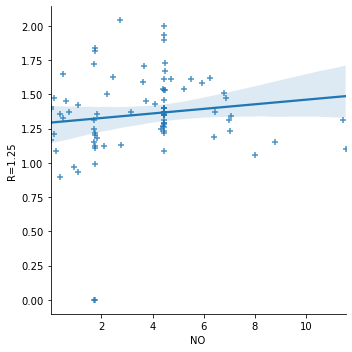

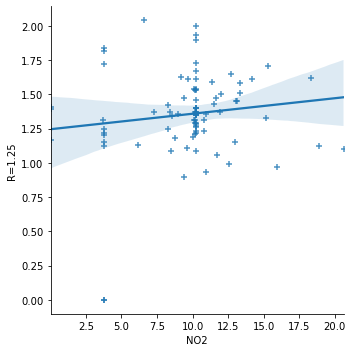

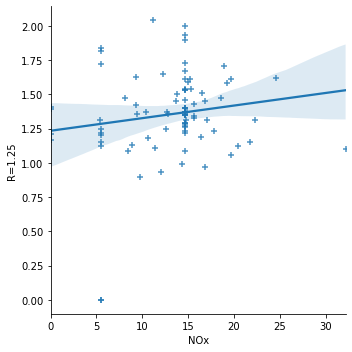

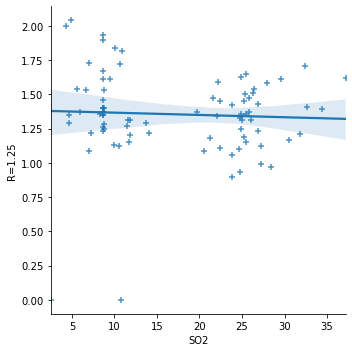

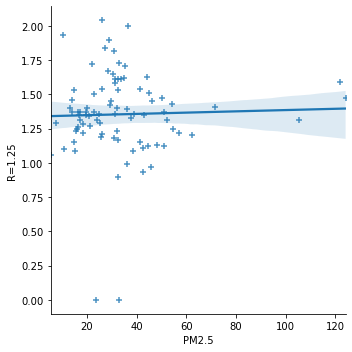

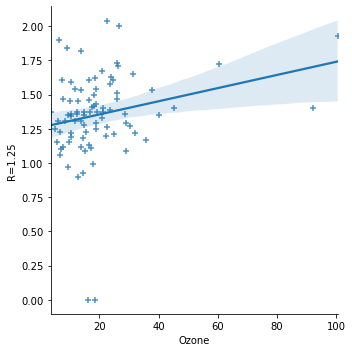

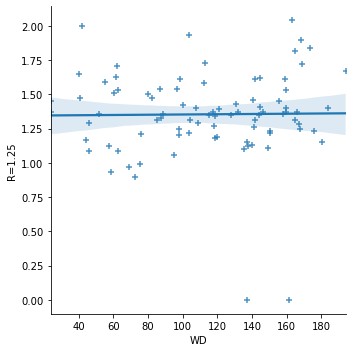

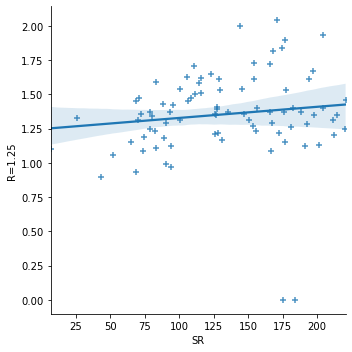

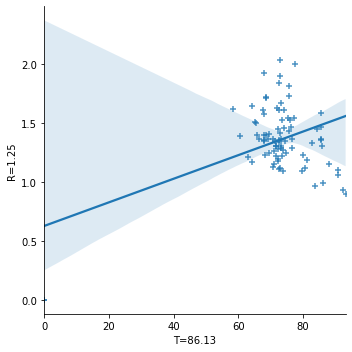

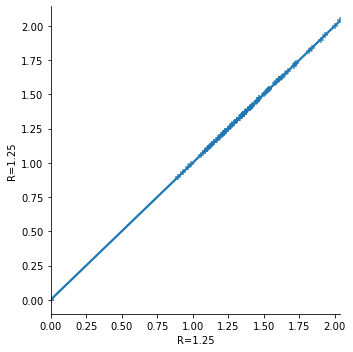

In [49]:
col2=df1.columns.tolist()[2:]
for i in df1.columns.tolist()[2:]:
    sns.lmplot(x=i,y='R=1.25',data=df1,markers='+')

# Find AQI On Concentration of PM2.5 on 24 hour average


# AQI Category                              Index Values   
            Good                                        0   -  30 
            Satisfactory                                30  -  60
            Moderate                                    60  –  90
            Poor                                        90  –  120
            Very Poor                                   120 –  250
            SEVERE                                      250 –  380                                 

In [51]:
# print("Enter Date in DD-MM-YYYY format:")Type Date from 01-01-2021 to 27-03-2021
#d=input("Enter Date:")
#df1=pd.read_csv('velachery_ AIQ2.csv')
#df2=pd.read_csv('perungudi_aiq.csv')

# print("Enter Date in DD-MM-YYYY format:")
d=input("Enter Date:")
#Select specific row of your dataframe

print(df1.loc[df1['Date'] == d])

print(df2.loc[df2['DATE'] == d])

#df1.loc[(df1['Date'] == d) & df1['PM2.5'].isin(df1)]

Enter Date:15-03-2021
          Date    CO    NO    NO2    NOx   SO2  PM2.5  Ozone      WD      SR  \
73  15-03-2021  0.46  4.46  10.25  14.69  8.65  13.98  16.54  140.44  220.61   

    T=86.13  R=1.25  
73    74.06    1.46  
          DATE  PM2.5    NO   NO2   NOx   SO2        CO  Ozone      WD     SR  \
73  15-03-2021  18.42  2.38  5.66  4.94  3.65  0.501177  29.13  186.72  171.4   

     Temp     RH  
73  27.26 -200.0  


In [52]:
row=int(input("Enter the Row_Value from the above output:"))
#Locate PM2.52.5 value
value1 = df1.iloc[row]["PM2.5"]
value2=df2.iloc[row]["PM2.5"]
print("Dataset 1 - PM2.5 Value: ",value1)
print("Dataset 2 - PM2.5 Value: ",value2)

Enter the Row_Value from the above output:73
Dataset 1 - PM2.5 Value:  13.98
Dataset 2 - PM2.5 Value:  18.42


In [53]:
value1=value1.astype('int')
value2=value2.astype('int')

        AQI Category                              Index Values
        Good                                        0   -  30 
        Satisfactory                                30  -  60
        Moderate                                    60  –  90
        Poor                                        90  –  120
        Very Poor                                   120 –  250
        SEVERE                                      250 –  380 

In [54]:
# Find the AQI Category of PM2.52.5 of First Dataset
if value1 > 250 and value1 < 380:
    print(value1,"Severe")
elif value1 > 120 and value1 < 250:
    print(value1,"Very Poor")
elif value1 > 90 and value1 < 120:
    print(value1,"Poor")
elif value1 > 60 and value1 < 90:
    print(value1,"Moderate")
elif value1 > 30 and value1 < 60:
    print(value1,"Satisfactory")
elif value1 > 0 and value1 < 30:
    print(value1,"Good")
else:
        print("error")

13 Good


In [55]:
# Find the AQI Category of PM2.5 of Second Dataset
if value2 > 250 and value2 < 380:
    print(value2,"Severe")
elif value2 > 120 and value2 < 250:
    print(value2,"Very Poor")
elif value2 > 90 and value2 < 120:
    print(value2,"Poor")
elif value2 > 60 and value2 < 90:
    print(value2,"Moderate")
elif value2 > 30 and value2 < 60:
    print(value2,"Satisfactory")
elif value2 > 0 and value2 < 30:
    print(value2,"Good")
else:
        print("error")

18 Good


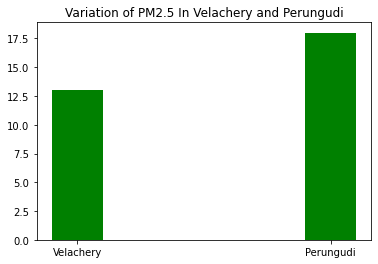

In [56]:
fig = plt.figure()
x1=['Velachery','Perungudi']
y1=[value1,value2]
plt.title("Variation of PM2.5 In Velachery and Perungudi")
plt.bar(x1,y1,width=0.2,color="green")
plt.show()

# Variation from Dataset

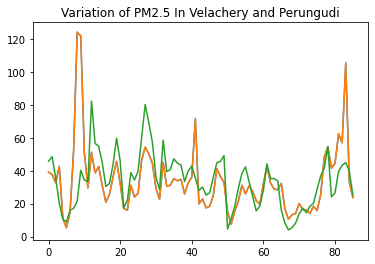

In [57]:
df1['PM2.5'].plot.line()
y1 = df1['PM2.5'] # DATASET 1
y2 = df2['PM2.5'] # DATASET 2
plt.title("Variation of PM2.5 In Velachery and Perungudi")
plt.plot(y1)
plt.plot(y2)
plt.show()

# Determining AIQ Value

        AQI Category                               Index Values 
        Good                                        0   -  50 
        Satisfactory                                51  -  100
        Moderate                                    101 –  200
        Poor                                        201 –  300
        Very Poor                                   301 –  400
        SEVERE                                      401 –  500       

In [58]:
X=df1["CO"].mean()
B=df1["NO2"].mean()
C=df1["SO2"].mean()
D=df1["PM2.5"].mean()
E=df1["Ozone"].mean()

In [59]:
Z1=(X+B+C+D+E)/5
print("Avg of Pollutants:- ",Z1)

Avg of Pollutants:-  16.189556346545636


In [60]:
if Z1 > 401 and Z1 < 500:
    print(Z1,"Severe")
elif Z1 > 301 and Z1 < 400:
    print(Z1,"Very Poor")
elif Z1 > 201 and Z1 < 300:
    print(Z1,"Poor")
elif Z1 > 101 and Z1 < 200:
    print(Z1,"Moderate")
elif Z1 > 51 and Z1 < 100:
    print(Z1,"Satisfactory")
elif Z1 > 0 and Z1 < 50:
    print(Z1,"Good")
else:
    print("error")

16.189556346545636 Good


In [61]:
X=df2["CO"].mean()
B=df2["NO2"].mean()
C=df2["SO2"].mean()
D=df2["PM2.5"].mean()
E=df2["Ozone"].mean()

In [62]:
Z2=(X+B+C+D+E)/5
print("Avg of Pollutants:- ",Z2)

Avg of Pollutants:-  11.443544555379415


In [63]:
if Z2 > 401 and Z2 < 500:
    print(Z2,"Severe")
elif Z2 > 301 and Z2 < 400:
    print(Z2,"Very Poor")
elif Z2 > 201 and Z2 < 300:
    print(Z2,"Poor")
elif Z2 > 101 and Z2 < 200:
    print(Z2,"Moderate")
elif Z2 > 51 and Z2 < 100:
    print(Z2,"Satisfactory")
elif Z2 > 0 and Z2 < 50:
    print(Z2,"Good")
else:
    print("error")

11.443544555379415 Good


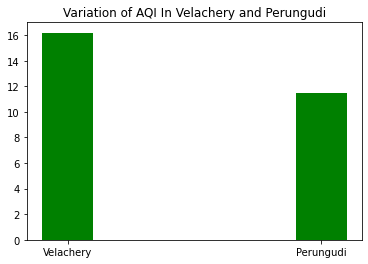

In [64]:
fig = plt.figure()
x1=['Velachery','Perungudi']
y1=[Z1,Z2]
plt.title("Variation of AQI In Velachery and Perungudi")
plt.bar(x1,y1,width=0.2,color="green")
plt.show()

# Regression Models of Dataset 1

# Linear Regression

In [65]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
#Let X-input and Y-input features
X=df1[col2].drop('R=1.25',1)     
Y=df1['R=1.25']   
SScaler=StandardScaler()
Xsd=SScaler.fit_transform(X)    #applying standardisation
X.head()

,NO,NO2,NOx,SO2,PM2.5,Ozone,WD,SR,T=86.13
0,0.39,8.98,9.37,24.87,39.08,28.57,51.76,72.72,85.47
1,0.51,15.15,15.66,24.73,37.73,20.98,87.63,26.32,82.78
2,0.37,9.42,9.79,23.82,32.69,12.67,72.54,43.12,93.15
3,1.09,10.91,12.00,24.81,42.69,14.29,58.93,68.59,92.27
4,11.55,20.61,32.16,24.66,10.97,7.15,135.53,6.86,90.95


In [67]:
X_train, X_test, y_train, y_test=train_test_split(Xsd,Y,test_size=0.4, random_state=3)

In [68]:
#Data-Size
print('Training Data Size:',X_train.shape)
print('Test Data Size:',X_test.shape)

Training Data Size: (51, 9)
Test Data Size: (35, 9)


In [69]:
model1= LinearRegression()

In [70]:
model1.fit(X_train,y_train)

LinearRegression()

In [71]:
print('Intercept:',model1.intercept_)

Intercept: 1.3708094345346638


In [72]:
prediction1 = model1.predict(X_test)
prediction1

array([1.51663344, 1.60373488, 1.5185239 , 1.56317882, 1.33868422,
       1.40575815, 0.51119798, 1.4380208 , 1.78429028, 1.42096369,
       1.40642991, 1.28786688, 1.45804811, 1.31094133, 1.54461272,
       1.36963331, 1.30542808, 1.87990966, 1.31750897, 1.29348627,
       1.43120448, 1.60826327, 1.18767742, 1.67458983, 1.26838785,
       1.18080446, 1.33015778, 1.37152417, 1.60209772, 1.53708531,
       1.16070193, 1.2086273 , 1.37849867, 1.44682296, 1.27831681])

In [75]:
print("Co-efficient:")
list(zip(X.columns,model1.coef_))

Co-efficient:


[('NO', 0.04687991955353219),
 ('NO2', 0.02351894813137108),
 ('NOx', -0.027245615297083088),
 ('SO2', 0.021986359180455974),
 ('PM2.5', 0.04811842810379412),
 ('Ozone', 0.08359813567301043),
 ('WD', 0.03701025757866004),
 ('SR', 0.13652598216744805),
 ('T=86.13', 0.17274852947337901)]

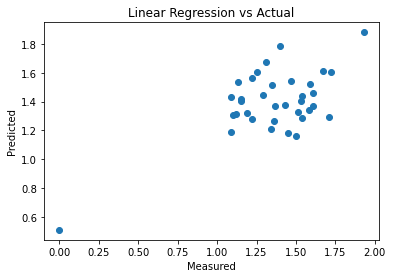

In [76]:
plt.scatter(y_test,prediction1)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression vs Actual')
plt.show()

In [80]:
#Root Mean Square Error
from sklearn import metrics
rs=np.sqrt(metrics.mean_squared_error(y_test,prediction1))
print(rs)
print("\n")
print("Therefore by applying Linear Regression we can predict RH using all the features together with RSME=",rs)

0.24183699291244914


Therefore by applying Linear Regression we can predict RH using all the features together with RSME= 0.24183699291244914


# Random Forest Regression

In [82]:
from sklearn.ensemble import RandomForestRegressor          
model2=RandomForestRegressor()

In [83]:
model2.fit(X_train,y_train)

RandomForestRegressor()

In [84]:
prediction2=model2.predict(X_test) 
prediction2

array([1.4782, 1.4462, 1.2529, 1.3252, 1.5184, 1.35  , 1.0848, 1.6186,
       1.3362, 1.2389, 1.4275, 1.3922, 1.5663, 1.2353, 1.2595, 1.4406,
       1.0634, 1.337 , 1.2794, 1.4828, 1.3992, 1.6588, 1.2933, 1.3144,
       1.4479, 1.2835, 1.4965, 1.4127, 1.4215, 1.3622, 1.3761, 1.2524,
       1.248 , 1.4219, 1.3865])

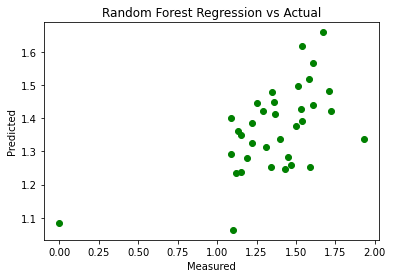

In [85]:
plt.scatter(y_test,prediction2,color='green')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression vs Actual')
plt.show()

In [87]:
#Root Mean Square Error
from sklearn import metrics
rs3=np.sqrt(metrics.mean_squared_error(y_test,prediction2))
print(rs3)
print("\n")
print("Therefore by applying Random Forest Regression we can predict RH using all the features together with RSME=",rs3)

0.26023917735147306


Therefore by applying Random Forest Regression we can predict RH using all the features together with RSME= 0.26023917735147306


In [88]:
print("So we acheive best results from:")
dict={"Linear Regression": rs,"Random Forest Regression": rs3}
res =  [key for key in dict if 
        all(dict[temp] >= dict[key] 
        for temp in dict)] 
min_ = {k: dict[k] for k in dict.keys() & set(res)}
print(min_)

So we acheive best results from:
{'Linear Regression': 0.24183699291244914}


# Conclusion